# Dealing with Missind Data with R

1. Video 1
- 5 ways to deal with missing Data:
    - Deleting all row with missing data
    - Deleteing rows with missing data inspecific variable
    - Change missing data to a value
    - https://www.youtube.com/watch?v=sUAMiAIUhcI
2. Video 2
- Imputation (means to fill the missing data with something predicted to what the data could possibly be) 
- https://www.youtube.com/watch?v=MpnxwNXGV-E

In [ ]:
library(tidyverse)

In [ ]:
head(starwars)

### Just grabbing the columns we want to look at

In [ ]:
starwars %>% 
    select(name, gender, hair_color, height) %>% 
    head()


### Shows only my rows with Missing Data

In [ ]:
starwars %>% 
    select(name, gender, hair_color, height) %>% 
    filter(!complete.cases(.)) %>%
    View()

complete.cases() is a functions that extracts only rows without missing data
by putting an ! in front on the function, this tells R to do the opposite, and gathers all rows with missing data
the (.) dot means we want to use the entire data frame

### This package can show you on a large scale of data, the distribution of where the missing data is


In [ ]:
library(mice)

In [ ]:
md.pattern(starwars)

# 1 
Omit all Rows that has missing data in it

It's a bad stradegy. You deleted any row of data that had any missing value and any variable. It's hard to know what you have removed. 

In [ ]:
starwars %>% 
    select(name, gender, hair_color, height) %>% 
    na.omit() %>%
    View()

# 2 
Omit all Rows that has missing data from a specific variable, in this case the `height` column

In [ ]:
starwars %>% 
    select(name, gender, hair_color, height) %>% 
    drop_na(height) %>%
    filter(!complete.cases(.)) %>%
    View()

# 3 
Omit all Rows that has missing data from a specific variable, in this case the `height` column.
AND
Change all the na's in the `gender` column to none by using the `mutate()` function.

`mutate()` can be used to change to a new variable or overwrite an exsisting variable

In [ ]:
starwars %>% 
    select(name, gender, hair_color, height) %>% 
    drop_na(height) %>%
    mutate(gender = replace_na(gender, "none")) %>%
    filter(!complete.cases(.)) %>%
    View()

# 4
`unique(dataset$column)` shows you all the variables in that specfic column and you can see what islisted for the variables. 

In [ ]:
unique(starwars$hair_color)

We can see that there are two variables, `NA` and `unknown`

In [ ]:
starwars %>% 
    select(name, gender, hair_color, height) %>% 
    mutate(hair_color = na_if(hair_color, "unknown")) %>%
    filter(is.na(hair_color)) %>%
    View()

This has created a new row added, includes the missing value `NA`, that hair_color use to be `unknown`

# 5
Let's see what happens when you apply a function to a vector that has missing values, in this case we havent removed any missing values, just looking for the average/mean `height` in all the characters...

In [ ]:
mean(starwars$height)

Oh no!!! When we do that it returned `NA`
We cannot calculate the mean for values if there is missing data so add the arguement `na.rm = TRUE`

In [ ]:
mean(starwars$height, na.rm = TRUE)

# THE END OF VIDEO 1

---

# Imputating Missing Data

#### Impute Methods:
1. Mean Method:
    - You take the average of that specfic feature and add it to all the missing values
    - It doesnt affect sample size or the overall mean of that feature
2. Median Method:
    - Good to use if there is alot of outliers with a dataset
    - Replace all the missing values with the median

Overall, `both of these methads are pretty bad` because for for one they dont' really take into condsideration of the relationsips anong many other independent features.Also, they are limited as to what data they can use. Example, really good on using on numerical type data, but not on catergorical type data or strings. One thing to take into consideration when you areworking with empty observations, or missing data, you should `never remove the observations`, just to have a `clean dataset`, this can `lead to inaccurate results`. In the real world, you would have to have a really good reason to remove the empty observations. Otherwise `removing it, will hampering the true value of the data`.

### More advance ways to impute your data:
3. K Nearest Neighbors 
    - Based on the distance observations, where you can average these values and start grouping observations together.
    - Numerical data
    - If you use categorical data, use a nearal network 
        - build a machine learning model to impute data
        - general this work well with both numerical and categorial
4. A Form of Regression
    - Find the relationship between missing features and other features within the dataset 
    - Popular method is to use `mice` aka `multiple imputation by chained equations`.
    - Method commonly used in psychiatric research and this method can handle categorical or numerical
    - Primary feature of `mice` this method executes mutilple imputations instead of single imputations there by maintaning some form of a realtionship among the feature
    - This technique provides statistical uncertainty measurement to imputation, whereas median and mean imputation there in no uncertainty measurement, which can lead to biased data. 
    
#### 4a. Form of Regression: Mice has 6 important Steps:
1. Step 1: Imputate values as placeholders
    -  Use simple imputation, use mean and median as placeholders
2. Step 2: Utilize  placeholders
    - Start with first feature with imputated values, and then set back to its original value
3. Step 3: Regress Feature
    - Original value of the original feature from step 2 is regressed on all the other features. Essentially the original feature is the dependent variable and the simple imputated feature of the other features are the independet features. The assumptions follow which ever regression technique you might  use.
4. Step 4: Impute Predictions from Regression
    - The missing values of original  feature  ie your dependent feature are replaced with with the predictions of your regression  model. ***Note: as you are imputing other features you will use the changed overservations of prior features as independent variables for you next imputation.
5. Step 5: Repeat steps 2-4 for 'x amount' cycles
    - Repeat steps 2-4 for each variable that needs imputations. 1 cycle is iterating through  all the featues once for imputation. Do this until you dont have any more features that need missing  values filled.  
6. Step 6: Repeat step 5 until convergance of end of cycle 
    - Keep repeating step 5, until you predefined and number of cycles have been complted with the imputations being updated at each cycle. The number of cycles vary among datasets. However, general rule of thumb is to go through 10 cycles. The main point behind the use of these cycle is to ensure you predictions  are converging  to a given  point. 

## Let's start imputating...
---

In [6]:
library(mice)

In [7]:
library(tidyverse)

In [3]:
library(dplyr)

In [4]:
data <- read_csv("../Data/data.csv")


Rows: 32560 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): Workclass, Edu, Marital, Occupation, Relationship, Race, Sex, Count...
dbl (6): Age, FnlWgt, EduNum, CapGain, CapLoss, HoursWeek

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
head(data)

Age Workclass        FnlWgt Edu       EduNum Marital              
1 50  Self-emp-not-inc  83311 Bachelors 13     Married-civ-spouse   
2 38  Private          215646 HS-grad    9     Divorced             
3 53  Private          234721 11th       7     Married-civ-spouse   
4 28  Private          338409 Bachelors 13     Married-civ-spouse   
5 37  Private          284582 Masters   14     Married-civ-spouse   
6 49  Private          160187 9th        5     Married-spouse-absent
  Occupation        Relationship  Race  Sex    CapGain CapLoss HoursWeek
1 Exec-managerial   Husband       White Male   0       0       13       
2 Handlers-cleaners Not-in-family White Male   0       0       40       
3 Handlers-cleaners Husband       Black Male   0       0       40       
4 Prof-specialty    Wife          Black Female 0       0       40       
5 Exec-managerial   Wife          White Female 0       0       40       
6 Other-service     Not-in-family Black Female 0       0       16       
  Country       Target
1 United-States <=50K 
2 United-States <=50K 
3 United-States <=50K 
4 Cuba          <=50K 
5 United-States <=50K 
6 Jamaica       <=50K

In [8]:
ncol(data)

[1] 15

In [9]:
nrow(data)

[1] 32560

In [10]:
# Checking out the NA's that we are working with...

In [11]:
data %>% summarise_all(funs(sum(is.na(.))))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


Age Workclass FnlWgt Edu EduNum Marital Occupation Relationship Race Sex
1 0   1836      0      0   0      0       1843       0            0    0  
  CapGain CapLoss HoursWeek Country Target
1 0       0       0         583     0

Results of missing data:
- Workclass: 1836
- Occupation: 1843
- Country: 583

Good rule of thumb, Approximately 5% of the data is missing. This is good threshold for this type of Data. If data is more that 5%, then we should probably leave this feature out. 

In [12]:
# These are the 3 categorical variables -- so the regression that we will use 

In [13]:
unique(data$Workclass)

[1] "Self-emp-not-inc" "Private"          "State-gov"        "Federal-gov"     
[5] "Local-gov"        NA                 "Self-emp-inc"     "Without-pay"     
[9] "Never-worked"

In [14]:
data %>% group_by(Workclass) %>% summarise(n = n())
# 9 unique classes 
# 8 bc there is 1 NA

Workclass        n    
1 Federal-gov        960
2 Local-gov         2093
3 Never-worked         7
4 Private          22696
5 Self-emp-inc      1116
6 Self-emp-not-inc  2541
7 State-gov         1297
8 Without-pay         14
9 NA                1836

In [15]:
unique(data$Occupation)

[1] "Exec-managerial"   "Handlers-cleaners" "Prof-specialty"   
 [4] "Other-service"     "Adm-clerical"      "Sales"            
 [7] "Craft-repair"      "Transport-moving"  "Farming-fishing"  
[10] "Machine-op-inspct" "Tech-support"      NA                 
[13] "Protective-serv"   "Armed-Forces"      "Priv-house-serv"

In [16]:
data %>% group_by(Occupation) %>% summarise(n = n())
# 15 unique classes
# 14 bc there is 1 NA

Occupation        n   
1  Adm-clerical      3769
2  Armed-Forces         9
3  Craft-repair      4099
4  Exec-managerial   4066
5  Farming-fishing    994
6  Handlers-cleaners 1370
7  Machine-op-inspct 2002
8  Other-service     3295
9  Priv-house-serv    149
10 Prof-specialty    4140
11 Protective-serv    649
12 Sales             3650
13 Tech-support       928
14 Transport-moving  1597
15 NA                1843

In [17]:
unique(data$Country)

[1] "United-States"              "Cuba"                      
 [3] "Jamaica"                    "India"                     
 [5] NA                           "Mexico"                    
 [7] "South"                      "Puerto-Rico"               
 [9] "Honduras"                   "England"                   
[11] "Canada"                     "Germany"                   
[13] "Iran"                       "Philippines"               
[15] "Italy"                      "Poland"                    
[17] "Columbia"                   "Cambodia"                  
[19] "Thailand"                   "Ecuador"                   
[21] "Laos"                       "Taiwan"                    
[23] "Haiti"                      "Portugal"                  
[25] "Dominican-Republic"         "El-Salvador"               
[27] "France"                     "Guatemala"                 
[29] "China"                      "Japan"                     
[31] "Yugoslavia"                 "Peru"                      
[33] "Outlying-US(Guam-USVI-etc)" "Scotland"                  
[35] "Trinadad&Tobago"            "Greece"                    
[37] "Nicaragua"                  "Vietnam"                   
[39] "Hong"                       "Ireland"                   
[41] "Hungary"                    "Holand-Netherlands"

In [18]:
data %>% group_by(Country) %>% summarise(n = n())
# 42 unique classes
# 41 bc there is 1 NA

Country                    n    
1  Cambodia                      19
2  Canada                       121
3  China                         75
4  Columbia                      59
5  Cuba                          95
6  Dominican-Republic            70
7  Ecuador                       28
8  El-Salvador                  106
9  England                       90
10 France                        29
11 Germany                      137
12 Greece                        29
13 Guatemala                     64
14 Haiti                         44
15 Holand-Netherlands             1
16 Honduras                      13
17 Hong                          20
18 Hungary                       13
19 India                        100
20 Iran                          43
21 Ireland                       24
22 Italy                         73
23 Jamaica                       81
24 Japan                         62
25 Laos                          18
26 Mexico                       643
27 Nicaragua                     34
28 Outlying-US(Guam-USVI-etc)    14
29 Peru                          31
30 Philippines                  198
31 Poland                        60
32 Portugal                      37
33 Puerto-Rico                  114
34 Scotland                      12
35 South                         80
36 Taiwan                        51
37 Thailand                      18
38 Trinadad&Tobago               19
39 United-States              29169
40 Vietnam                       67
41 Yugoslavia                    16
42 NA                           583

#### Note, these are all catergorical data that we will be predicting, these are categorical variables and also in this case factors. The same approach will work for numerical data given for `mice` since we are going to be regressing on these terms.

### 1. Mean and Median Method
- Easiest way to do Imputation
- Mean and Median Method
- Not the best results

In [19]:
# data$column[is.na(data$column)] <- median(data$colmn, na.rm = TRUE)
# data$column[is.na(data$column)] <- mean(data$column, na.rm = TRUE)

# It really is quite simple, but just not effective

### 2a. Getting started using `MICE`
- Subset the data you want to imputate
- We do this just to double check our work and see how well the imputations are going and what they are doing
- also shows the relation and what is happening

In [20]:
data_occupation_subset <- subset(data, is.na(data$Occupation))

In [21]:
data_workclass_subset <- subset(data, is.na(data$Workclass))

In [22]:
data_country_subset <- subset(data, is.na(data$Country))

### 2b.Begin the `MICE` process
- Take a look at the missing data patterns

Age FnlWgt Edu EduNum Marital Relationship Race Sex CapGain CapLoss
30161 1   1      1   1      1       1            1    1   1       1      
7     1   1      1   1      1       1            1    1   1       1      
1809  1   1      1   1      1       1            1    1   1       1      
556   1   1      1   1      1       1            1    1   1       1      
27    1   1      1   1      1       1            1    1   1       1      
      0   0      0   0      0       0            0    0   0       0      
      HoursWeek Target Country Workclass Occupation     
30161 1         1        1        1         1          0
7     1         1        1        1         0          1
1809  1         1        1        0         0          2
556   1         1        0        1         1          1
27    1         1        0        0         0          3
      0         0      583     1836      1843       4262

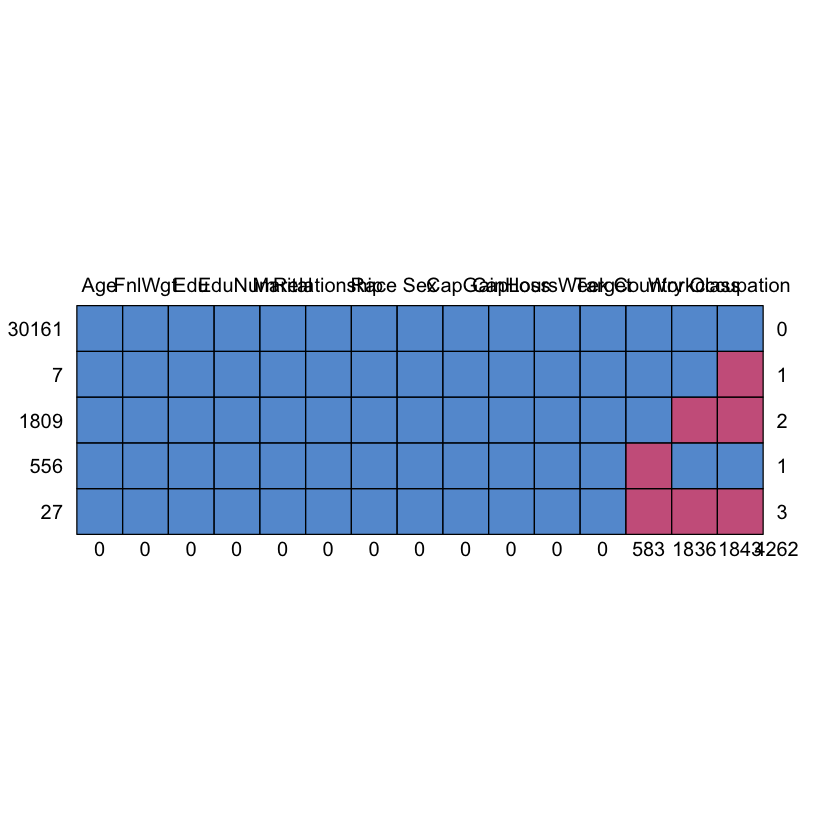

In [23]:
md.pattern(data)

In [24]:
library(repr)

#### I wanted to see the graph more spread out to see my observations, put some agruments in there to help make the graph wider, but now i cant figure out the font size. im moving on we can look at the grpah above for reference. 

Age FnlWgt Edu EduNum Marital Relationship Race Sex CapGain CapLoss
30161 1   1      1   1      1       1            1    1   1       1      
7     1   1      1   1      1       1            1    1   1       1      
1809  1   1      1   1      1       1            1    1   1       1      
556   1   1      1   1      1       1            1    1   1       1      
27    1   1      1   1      1       1            1    1   1       1      
      0   0      0   0      0       0            0    0   0       0      
      HoursWeek Target Country Workclass Occupation     
30161 1         1        1        1         1          0
7     1         1        1        1         0          1
1809  1         1        1        0         0          2
556   1         1        0        1         1          1
27    1         1        0        0         0          3
      0         0      583     1836      1843       4262

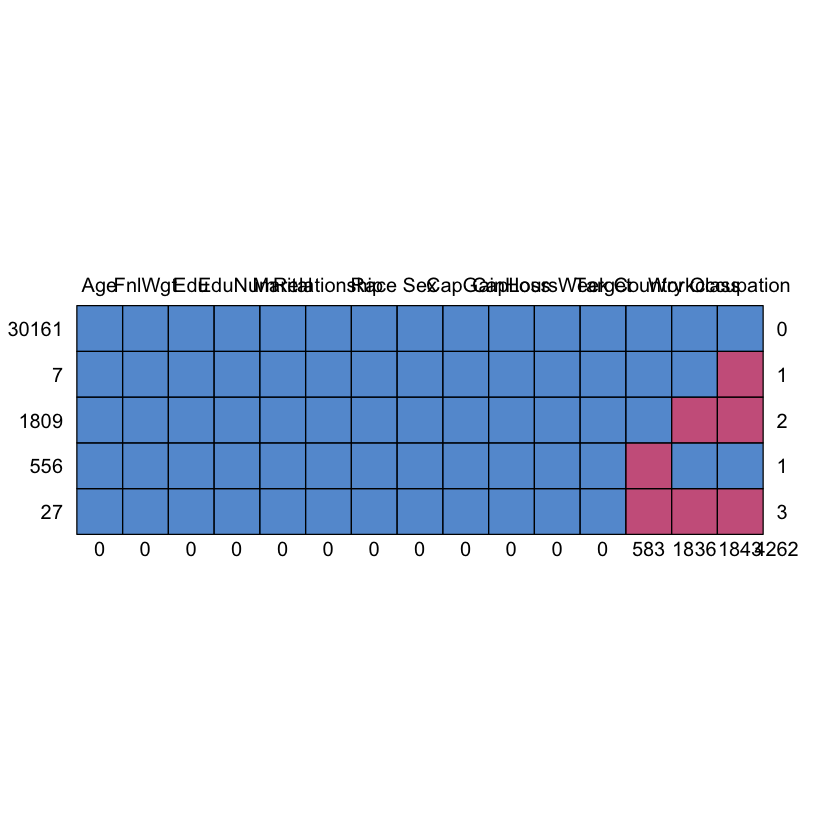

In [25]:
md.pattern(data)
options(repr.plot.width=200, repr.plot.height=80, cex.lab=2.5)

In [26]:
nrow(data)

[1] 32560

In [27]:
# Blue squares reprsent the observations that don't have NA's. 
# 30161 / 32560 observations that do not have NA's (have total amount, nrow(data), rough estimate).
# 7- NA's observations in Ocuupation
# 1809 - NA's observations in Workclass
# 556 - NA's observations in Country

# Note: only 3 features that have NA values

### 2c. Addtional Plot
- Helpful representation
- https://datascienceplus.com/imputing-missing-data-with-r-mice-package/ 

In [28]:
#install.packages("VIM")

In [31]:
library(VIM)

In [32]:
aggr_plot <- aggr(data, col=c('navyblue','red'), 
                  numbers=TRUE, 
                  sortVars=TRUE, 
                  labels=names(data), 
                  cex.axis=.7, 
                  gap=3, 
                  ylab=c("Histogram of missing data","Pattern"))

Warning message in plot.aggr(res, ...):
“not enough horizontal space to display frequencies”



 Variables sorted by number of missings: 
     Variable      Count
   Occupation 0.05660319
    Workclass 0.05638821
      Country 0.01790541
          Age 0.00000000
       FnlWgt 0.00000000
          Edu 0.00000000
       EduNum 0.00000000
      Marital 0.00000000
 Relationship 0.00000000
         Race 0.00000000
          Sex 0.00000000
      CapGain 0.00000000
      CapLoss 0.00000000
    HoursWeek 0.00000000
       Target 0.00000000


#### Results of the Graph:
- we can see the occupation missing data is only 5.66%
- we can see the workclass missing data is only 5.63%
- we can see the counttry missing data is only 0.17%

If they were above 5%, probably smart to just remove the whole column.

### Next steps: 
- We have identified what we are imputing 
- The number of observations
- Use the mice function 
- `m` is the number of imputed datasets (# of cycles)
- Figure out which regression methods you can use

In [33]:
methods(mice)

Warning message in .S3methods(generic.function, class, envir):
“function 'mice' appears not to be S3 generic; found functions that look like S3 methods”


 [1] mice.impute.2l.bin              mice.impute.2l.lmer            
 [3] mice.impute.2l.norm             mice.impute.2l.pan             
 [5] mice.impute.2lonly.mean         mice.impute.2lonly.norm        
 [7] mice.impute.2lonly.pmm          mice.impute.cart               
 [9] mice.impute.jomoImpute          mice.impute.lasso.logreg       
[11] mice.impute.lasso.norm          mice.impute.lasso.select.logreg
[13] mice.impute.lasso.select.norm   mice.impute.lda                
[15] mice.impute.logreg              mice.impute.logreg.boot        
[17] mice.impute.mean                mice.impute.midastouch         
[19] mice.impute.mnar.logreg         mice.impute.mnar.norm          
[21] mice.impute.norm                mice.impute.norm.boot          
[23] mice.impute.norm.nob            mice.impute.norm.predict       
[25] mice.impute.panImpute           mice.impute.passive            
[27] mice.impute.pmm                 mice.impute.polr               
[29] mice.impute.polyreg          

#### Results:
Want to use random forest, particularly this random forest function. We have `catergoircal data`, and we dont have alot of numerical data.`Random forest` will be the `best fit to impute this particular data`
- `[31] mice.impute.rf`

### Use `mice` function

##### DOES NOT WORK CORRECTLY, WILL USE THIS SAME CONCEPT ON DIFFERENT DAATA TO SEE IF WORKS LATER!!!!


- What is a Random Seed? A random seed is used to ensure that results are reproducible. In other words, using this parameter makes sure that anyone who re-runs your code will get the exact same outputs. Reproducibility is an extremely important concept in data science and other fields.



In [104]:
imputed_data <- mice(data, m = 5, method = "rf", rnorm(5))

ERROR: Error: predictorMatrix not a matrix


In [105]:
summary(imputed_data)

Class: mids
Number of multiple imputations:  5 
Imputation methods:
         Age    Workclass       FnlWgt          Edu       EduNum      Marital 
          ""           ""           ""           ""           ""           "" 
  Occupation Relationship         Race          Sex      CapGain      CapLoss 
          ""           ""           ""           ""           ""           "" 
   HoursWeek      Country       Target 
          ""           ""           "" 
PredictorMatrix:
          Age Workclass FnlWgt Edu EduNum Marital Occupation Relationship Race
Age         0         0      1   0      1       0          0            0    0
Workclass   0         0      0   0      0       0          0            0    0
FnlWgt      1         0      0   0      1       0          0            0    0
Edu         1         0      1   0      1       0          0            0    0
EduNum      1         0      1   0      0       0          0            0    0
Marital     1         0      1   0      1    

In [86]:
# look at the imputed data
imputed_data$imp

# these are supposed to be the given predicted values for this columns with missing values
# this shows the 5 cycles, or 5 different datasets that they imputed the data and cycles through... 
#### supposed to show imputed data, but crrrenlty shwoing NA's still, due to the mice function not running correctly. 

$Age
[1] 1 2 3 4 5
<0 rows> (or 0-length row.names)

$Workclass
       1  2  3  4  5
27    NA NA NA NA NA
61    NA NA NA NA NA
69    NA NA NA NA NA
77    NA NA NA NA NA
106   NA NA NA NA NA
128   NA NA NA NA NA
149   NA NA NA NA NA
154   NA NA NA NA NA
160   NA NA NA NA NA
187   NA NA NA NA NA
201   NA NA NA NA NA
221   NA NA NA NA NA
226   NA NA NA NA NA
243   NA NA NA NA NA
266   NA NA NA NA NA
297   NA NA NA NA NA
312   NA NA NA NA NA
326   NA NA NA NA NA
346   NA NA NA NA NA
347   NA NA NA NA NA
354   NA NA NA NA NA
397   NA NA NA NA NA
408   NA NA NA NA NA
430   NA NA NA NA NA
431   NA NA NA NA NA
449   NA NA NA NA NA
459   NA NA NA NA NA
471   NA NA NA NA NA
484   NA NA NA NA NA
486   NA NA NA NA NA
499   NA NA NA NA NA
511   NA NA NA NA NA
515   NA NA NA NA NA
517   NA NA NA NA NA
518   NA NA NA NA NA
539   NA NA NA NA NA
576   NA NA NA NA NA
580   NA NA NA NA NA
590   NA NA NA NA NA
591   NA NA NA NA NA
596   NA NA NA NA NA
648   NA NA NA NA NA
656   NA NA NA NA NA
668   NA NA NA NA NA
671   NA NA NA NA NA
686   NA NA NA NA NA
695   NA NA NA NA NA
734   NA NA NA NA NA
788   NA NA NA NA NA
789   NA NA NA NA NA
792   NA NA NA NA NA
806   NA NA NA NA NA
811   NA NA NA NA NA
830   NA NA NA NA NA
834   NA NA NA NA NA
885   NA NA NA NA NA
890   NA NA NA NA NA
903   NA NA NA NA NA
924   NA NA NA NA NA
931   NA NA NA NA NA
969   NA NA NA NA NA
982   NA NA NA NA NA
1019  NA NA NA NA NA
1034  NA NA NA NA NA
1035  NA NA NA NA NA
1039  NA NA NA NA NA
1046  NA NA NA NA NA
1097  NA NA NA NA NA
1100  NA NA NA NA NA
1131  NA NA NA NA NA
1134  NA NA NA NA NA
1152  NA NA NA NA NA
1167  NA NA NA NA NA
1175  NA NA NA NA NA
1180  NA NA NA NA NA
1185  NA NA NA NA NA
1208  NA NA NA NA NA
1215  NA NA NA NA NA
1217  NA NA NA NA NA
1262  NA NA NA NA NA
1282  NA NA NA NA NA
1290  NA NA NA NA NA
1312  NA NA NA NA NA
1317  NA NA NA NA NA
1325  NA NA NA NA NA
1347  NA NA NA NA NA
1349  NA NA NA NA NA
1371  NA NA NA NA NA
1388  NA NA NA NA NA
1404  NA NA NA NA NA
1420  NA NA NA NA NA
1433  NA NA NA NA NA
1441  NA NA NA NA NA
1452  NA NA NA NA NA
1458  NA NA NA NA NA
1504  NA NA NA NA NA
1544  NA NA NA NA NA
1562  NA NA NA NA NA
1569  NA NA NA NA NA
1570  NA NA NA NA NA
1574  NA NA NA NA NA
1579  NA NA NA NA NA
1592  NA NA NA NA NA
1606  NA NA NA NA NA
1629  NA NA NA NA NA
1656  NA NA NA NA NA
1665  NA NA NA NA NA
1676  NA NA NA NA NA
1704  NA NA NA NA NA
1707  NA NA NA NA NA
1758  NA NA NA NA NA
1761  NA NA NA NA NA
1773  NA NA NA NA NA
1778  NA NA NA NA NA
1823  NA NA NA NA NA
1846  NA NA NA NA NA
1851  NA NA NA NA NA
1865  NA NA NA NA NA
1878  NA NA NA NA NA
1923  NA NA NA NA NA
1931  NA NA NA NA NA
1971  NA NA NA NA NA
1987  NA NA NA NA NA
2025  NA NA NA NA NA
2036  NA NA NA NA NA
2046  NA NA NA NA NA
2061  NA NA NA NA NA
2072  NA NA NA NA NA
2084  NA NA NA NA NA
2091  NA NA NA NA NA
2094  NA NA NA NA NA
2105  NA NA NA NA NA
2118  NA NA NA NA NA
2126  NA NA NA NA NA
2152  NA NA NA NA NA
2155  NA NA NA NA NA
2163  NA NA NA NA NA
2164  NA NA NA NA NA
2210  NA NA NA NA NA
2213  NA NA NA NA NA
2222  NA NA NA NA NA
2281  NA NA NA NA NA
2292  NA NA NA NA NA
2323  NA NA NA NA NA
2327  NA NA NA NA NA
2340  NA NA NA NA NA
2354  NA NA NA NA NA
2356  NA NA NA NA NA
2358  NA NA NA NA NA
2359  NA NA NA NA NA
2372  NA NA NA NA NA
2380  NA NA NA NA NA
2382  NA NA NA NA NA
2397  NA NA NA NA NA
2420  NA NA NA NA NA
2427  NA NA NA NA NA
2464  NA NA NA NA NA
2476  NA NA NA NA NA
2486  NA NA NA NA NA
2491  NA NA NA NA NA
2496  NA NA NA NA NA
2506  NA NA NA NA NA
2513  NA NA NA NA NA
2521  NA NA NA NA NA
2544  NA NA NA NA NA
2566  NA NA NA NA NA
2570  NA NA NA NA NA
2571  NA NA NA NA NA
2578  NA NA NA NA NA
2586  NA NA NA NA NA
2594  NA NA NA NA NA
2606  NA NA NA NA NA
2632  NA NA NA NA NA
2634  NA NA NA NA NA
2638  NA NA NA NA NA
2673  NA NA NA NA NA
2676  NA NA NA NA NA
2689  NA NA NA NA NA
2751  NA NA NA NA NA
2760  NA NA NA NA NA
2761  NA NA NA NA NA
2847  NA NA NA NA NA
2856  NA NA NA NA NA
2857  NA NA NA NA NA
2858  NA NA NA NA NA
2885  NA NA NA NA NA
2930  NA 

In [87]:
# step further and look at the imputed data for specific variable 
# Workclass
imputed_data$imp$Workclass

#these are supposed to be the given predicted values for this column

1  2  3  4  5 
27    NA NA NA NA NA
61    NA NA NA NA NA
69    NA NA NA NA NA
77    NA NA NA NA NA
106   NA NA NA NA NA
128   NA NA NA NA NA
149   NA NA NA NA NA
154   NA NA NA NA NA
160   NA NA NA NA NA
187   NA NA NA NA NA
201   NA NA NA NA NA
221   NA NA NA NA NA
226   NA NA NA NA NA
243   NA NA NA NA NA
266   NA NA NA NA NA
297   NA NA NA NA NA
312   NA NA NA NA NA
326   NA NA NA NA NA
346   NA NA NA NA NA
347   NA NA NA NA NA
354   NA NA NA NA NA
397   NA NA NA NA NA
408   NA NA NA NA NA
430   NA NA NA NA NA
431   NA NA NA NA NA
449   NA NA NA NA NA
459   NA NA NA NA NA
471   NA NA NA NA NA
484   NA NA NA NA NA
486   NA NA NA NA NA
⋮     ⋮  ⋮  ⋮  ⋮  ⋮ 
32016 NA NA NA NA NA
32039 NA NA NA NA NA
32062 NA NA NA NA NA
32070 NA NA NA NA NA
32073 NA NA NA NA NA
32075 NA NA NA NA NA
32080 NA NA NA NA NA
32083 NA NA NA NA NA
32088 NA NA NA NA NA
32093 NA NA NA NA NA
32103 NA NA NA NA NA
32189 NA NA NA NA NA
32201 NA NA NA NA NA
32206 NA NA NA NA NA
32275 NA NA NA NA NA
32291 NA NA NA NA NA
32310 NA NA NA NA NA
32317 NA NA NA NA NA
32335 NA NA NA NA NA
32343 NA NA NA NA NA
32426 NA NA NA NA NA
32477 NA NA NA NA NA
32490 NA NA NA NA NA
32494 NA NA NA NA NA
32525 NA NA NA NA NA
32530 NA NA NA NA NA
32531 NA NA NA NA NA
32539 NA NA NA NA NA
32541 NA NA NA NA NA
32542 NA NA NA NA NA

In [88]:
#View(data_workclass_subset)

In [89]:
unique(data$Workclass)

[1] "Self-emp-not-inc" "Private"          "State-gov"        "Federal-gov"     
[5] "Local-gov"        NA                 "Self-emp-inc"     "Without-pay"     
[9] "Never-worked"

In [90]:
# Country
imputed_data$imp$Country

#these are supposed to be the given predicted values for this column

1  2  3  4  5 
14    NA NA NA NA NA
38    NA NA NA NA NA
51    NA NA NA NA NA
61    NA NA NA NA NA
93    NA NA NA NA NA
245   NA NA NA NA NA
249   NA NA NA NA NA
297   NA NA NA NA NA
393   NA NA NA NA NA
453   NA NA NA NA NA
557   NA NA NA NA NA
712   NA NA NA NA NA
725   NA NA NA NA NA
729   NA NA NA NA NA
777   NA NA NA NA NA
780   NA NA NA NA NA
887   NA NA NA NA NA
955   NA NA NA NA NA
1026  NA NA NA NA NA
1036  NA NA NA NA NA
1115  NA NA NA NA NA
1152  NA NA NA NA NA
1158  NA NA NA NA NA
1199  NA NA NA NA NA
1224  NA NA NA NA NA
1252  NA NA NA NA NA
1326  NA NA NA NA NA
1348  NA NA NA NA NA
1391  NA NA NA NA NA
1554  NA NA NA NA NA
⋮     ⋮  ⋮  ⋮  ⋮  ⋮ 
30700 NA NA NA NA NA
30773 NA NA NA NA NA
30821 NA NA NA NA NA
30902 NA NA NA NA NA
30922 NA NA NA NA NA
31089 NA NA NA NA NA
31128 NA NA NA NA NA
31336 NA NA NA NA NA
31359 NA NA NA NA NA
31387 NA NA NA NA NA
31396 NA NA NA NA NA
31468 NA NA NA NA NA
31555 NA NA NA NA NA
31637 NA NA NA NA NA
31641 NA NA NA NA NA
31701 NA NA NA NA NA
31796 NA NA NA NA NA
31944 NA NA NA NA NA
32090 NA NA NA NA NA
32169 NA NA NA NA NA
32213 NA NA NA NA NA
32232 NA NA NA NA NA
32254 NA NA NA NA NA
32307 NA NA NA NA NA
32413 NA NA NA NA NA
32449 NA NA NA NA NA
32469 NA NA NA NA NA
32492 NA NA NA NA NA
32510 NA NA NA NA NA
32525 NA NA NA NA NA

In [91]:
unique(data$Country)

[1] "United-States"              "Cuba"                      
 [3] "Jamaica"                    "India"                     
 [5] NA                           "Mexico"                    
 [7] "South"                      "Puerto-Rico"               
 [9] "Honduras"                   "England"                   
[11] "Canada"                     "Germany"                   
[13] "Iran"                       "Philippines"               
[15] "Italy"                      "Poland"                    
[17] "Columbia"                   "Cambodia"                  
[19] "Thailand"                   "Ecuador"                   
[21] "Laos"                       "Taiwan"                    
[23] "Haiti"                      "Portugal"                  
[25] "Dominican-Republic"         "El-Salvador"               
[27] "France"                     "Guatemala"                 
[29] "China"                      "Japan"                     
[31] "Yugoslavia"                 "Peru"                      
[33] "Outlying-US(Guam-USVI-etc)" "Scotland"                  
[35] "Trinadad&Tobago"            "Greece"                    
[37] "Nicaragua"                  "Vietnam"                   
[39] "Hong"                       "Ireland"                   
[41] "Hungary"                    "Holand-Netherlands"

In [92]:
# Occupation
imputed_data$imp$Occupation

#these are supposed to be the given predicted values for this column

1  2  3  4  5 
27    NA NA NA NA NA
61    NA NA NA NA NA
69    NA NA NA NA NA
77    NA NA NA NA NA
106   NA NA NA NA NA
128   NA NA NA NA NA
149   NA NA NA NA NA
154   NA NA NA NA NA
160   NA NA NA NA NA
187   NA NA NA NA NA
201   NA NA NA NA NA
221   NA NA NA NA NA
226   NA NA NA NA NA
243   NA NA NA NA NA
266   NA NA NA NA NA
297   NA NA NA NA NA
312   NA NA NA NA NA
326   NA NA NA NA NA
346   NA NA NA NA NA
347   NA NA NA NA NA
354   NA NA NA NA NA
397   NA NA NA NA NA
408   NA NA NA NA NA
430   NA NA NA NA NA
431   NA NA NA NA NA
449   NA NA NA NA NA
459   NA NA NA NA NA
471   NA NA NA NA NA
484   NA NA NA NA NA
486   NA NA NA NA NA
⋮     ⋮  ⋮  ⋮  ⋮  ⋮ 
32062 NA NA NA NA NA
32070 NA NA NA NA NA
32073 NA NA NA NA NA
32075 NA NA NA NA NA
32080 NA NA NA NA NA
32083 NA NA NA NA NA
32088 NA NA NA NA NA
32093 NA NA NA NA NA
32103 NA NA NA NA NA
32189 NA NA NA NA NA
32201 NA NA NA NA NA
32206 NA NA NA NA NA
32275 NA NA NA NA NA
32291 NA NA NA NA NA
32304 NA NA NA NA NA
32310 NA NA NA NA NA
32314 NA NA NA NA NA
32317 NA NA NA NA NA
32335 NA NA NA NA NA
32343 NA NA NA NA NA
32426 NA NA NA NA NA
32477 NA NA NA NA NA
32490 NA NA NA NA NA
32494 NA NA NA NA NA
32525 NA NA NA NA NA
32530 NA NA NA NA NA
32531 NA NA NA NA NA
32539 NA NA NA NA NA
32541 NA NA NA NA NA
32542 NA NA NA NA NA

In [93]:
unique(data$Occupation)

[1] "Exec-managerial"   "Handlers-cleaners" "Prof-specialty"   
 [4] "Other-service"     "Adm-clerical"      "Sales"            
 [7] "Craft-repair"      "Transport-moving"  "Farming-fishing"  
[10] "Machine-op-inspct" "Tech-support"      NA                 
[13] "Protective-serv"   "Armed-Forces"      "Priv-house-serv"

In [94]:
# name_Of_Finished_Imputed_Dataset_Name <- complete(Orginal_Imputed_Datset_Name, whatever cycle # that you want to be replace the mising data with)
finished_imputed_data <- complete(imputed_data,1)

In [95]:
View(finished_imputed_data)
# we can see from the data above that all the missing values we indeed replaced
# using 1st column for each other these observations given 

Age Workclass        FnlWgt Edu          EduNum Marital              
1     50  Self-emp-not-inc  83311 Bachelors    13     Married-civ-spouse   
2     38  Private          215646 HS-grad       9     Divorced             
3     53  Private          234721 11th          7     Married-civ-spouse   
4     28  Private          338409 Bachelors    13     Married-civ-spouse   
5     37  Private          284582 Masters      14     Married-civ-spouse   
6     49  Private          160187 9th           5     Married-spouse-absent
7     52  Self-emp-not-inc 209642 HS-grad       9     Married-civ-spouse   
8     31  Private           45781 Masters      14     Never-married        
9     42  Private          159449 Bachelors    13     Married-civ-spouse   
10    37  Private          280464 Some-college 10     Married-civ-spouse   
11    30  State-gov        141297 Bachelors    13     Married-civ-spouse   
12    23  Private          122272 Bachelors    13     Never-married        
13    32  Private          205019 Assoc-acdm   12     Never-married        
14    40  Private          121772 Assoc-voc    11     Married-civ-spouse   
15    34  Private          245487 7th-8th       4     Married-civ-spouse   
16    25  Self-emp-not-inc 176756 HS-grad       9     Never-married        
17    32  Private          186824 HS-grad       9     Never-married        
18    38  Private           28887 11th          7     Married-civ-spouse   
19    43  Self-emp-not-inc 292175 Masters      14     Divorced             
20    40  Private          193524 Doctorate    16     Married-civ-spouse   
21    54  Private          302146 HS-grad       9     Separated            
22    35  Federal-gov       76845 9th           5     Married-civ-spouse   
23    43  Private          117037 11th          7     Married-civ-spouse   
24    59  Private          109015 HS-grad       9     Divorced             
25    56  Local-gov        216851 Bachelors    13     Married-civ-spouse   
26    19  Private          168294 HS-grad       9     Never-married        
27    54  NA               180211 Some-college 10     Married-civ-spouse   
28    39  Private          367260 HS-grad       9     Divorced             
29    49  Private          193366 HS-grad       9     Married-civ-spouse   
30    23  Local-gov        190709 Assoc-acdm   12     Never-married        
⋮     ⋮   ⋮                ⋮      ⋮            ⋮      ⋮                    
32531 30  NA                33811 Bachelors    13     Never-married        
32532 34  Private          204461 Doctorate    16     Married-civ-spouse   
32533 54  Private          337992 Bachelors    13     Married-civ-spouse   
32534 37  Private          179137 Some-college 10     Divorced             
32535 22  Private          325033 12th          8     Never-married        
32536 34  Private          160216 Bachelors    13     Never-married        
32537 30  Private          345898 HS-grad       9     Never-married        
32538 38  Private          139180 Bachelors    13     Divorced             
32539 71  NA               287372 Doctorate    16     Married-civ-spouse   
32540 45  State-gov        252208 HS-grad       9     Separated            
32541 41  NA               202822 HS-grad       9     Separated            
32542 72  NA               129912 HS-grad       9     Married-civ-spouse   
32543 45  Local-gov        119199 Assoc-acdm   12     Divorced             
32544 31  Private          199655 Masters      14     Divorced             
32545 39  Local-gov        111499 Assoc-acdm   12     Married-civ-spouse   
32546 37  Private          198216 Assoc-acdm   12     Divorced             
32547 43  Private          260761 HS-grad       9     Married-civ-spouse   
32548 65  Self-emp-not-inc  99359 Prof-school  15     Never-married        
32549 43  State-gov        255835 Some-college 10     Divorced             
32550 43  Self-emp-not-inc  27242 Some-college 10     Married-civ-spouse   
32551 32  Private           34066 10th          6     

In [96]:
# dimension of the dataset
# output looks correct, based off of out total columns and rows
dim(finished_imputed_data)

[1] 32560    15

In [97]:
# Let's double check ot see if the missing values are gone
sapply(finished_imputed_data, function(x) sum(is.na(x)))
       
# you want all the outputs to be zeros (once again, the mice function up top doesnt seem to work and throwing everything off)
# why??? ugh

Age    Workclass       FnlWgt          Edu       EduNum      Marital 
           0         1836            0            0            0            0 
  Occupation Relationship         Race          Sex      CapGain      CapLoss 
        1843            0            0            0            0            0 
   HoursWeek      Country       Target 
           0          583            0

In [98]:
# let's double again...
finished_imputed_data %>% summarise_all(funs(sum(is.na(.))))

# nope the data is showing there are still missing values in the finsihed product, although when Viewing the dataset, its looks to be completed

Age Workclass FnlWgt Edu EduNum Marital Occupation Relationship Race Sex
1 0   1836      0      0   0      0       1843       0            0    0  
  CapGain CapLoss HoursWeek Country Target
1 0       0       0         583     0

In [99]:
# Let's check again
# Nope still see NA's in there
View(unique(finished_imputed_data$Workclass))

[1] "Self-emp-not-inc" "Private"          "State-gov"        "Federal-gov"     
[5] "Local-gov"        NA                 "Self-emp-inc"     "Without-pay"     
[9] "Never-worked"

In [80]:
### SHIT!!!! WHY!!! UGH!!! ###

# Continue

In [101]:
# Since out target is a binary outcome... let's use a logistic regression model:
# if you want to use all 5 cycles, you can input the imputed data, and runt he target variable against the missing values columns. 
# the Target variable is to see if a given income is greater than or less than 50k based off
# workclass, occupation, and conutry. That is what this will be predicting
# this will run a glinear model on all 5 given cycles


### model <- with(imputed_data, glm(Target ~ Workclass + Country + Occupation, family= binomial))
### summary(pool(model))

# checking out the model
# seperates the variables from the features within and co-effiecients are provided and provides the AIC code. 
# need to google the meanings of these to get true definition


# The End